In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import KMeans
from sklearn.manifold import MDS

In [4]:
pd.__version__

'0.20.1'

In [5]:
matplotlib.__version__

'2.0.2'

In [17]:
cereal = pd.read_csv('./cereals.csv')
cereal

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.00,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.00,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.00,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.00,0.50,93.704912
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.00,0.75,34.384843
5,Apple_Cinnamon_Cheerios,G,C,110,2,2,180,1.5,10.5,10.0,70.0,25,1,1.00,0.75,29.509541
6,Apple_Jacks,K,C,110,2,0,125,1.0,11.0,14.0,30.0,25,2,1.00,1.00,33.174094
7,Basic_4,G,C,130,3,2,210,2.0,18.0,8.0,100.0,25,3,1.33,0.75,37.038562
8,Bran_Chex,R,C,90,2,1,200,4.0,15.0,6.0,125.0,25,1,1.00,0.67,49.120253
9,Bran_Flakes,P,C,90,3,0,210,5.0,13.0,5.0,190.0,25,3,1.00,0.67,53.313813


In [12]:
cereal.isnull().sum(axis=1)==0

0      True
1      True
2      True
3      True
4     False
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20    False
21     True
22     True
23     True
24     True
25     True
26     True
27     True
28     True
29     True
      ...  
47     True
48     True
49     True
50     True
51     True
52     True
53     True
54     True
55     True
56     True
57    False
58     True
59     True
60     True
61     True
62     True
63     True
64     True
65     True
66     True
67     True
68     True
69     True
70     True
71     True
72     True
73     True
74     True
75     True
76     True
Length: 77, dtype: bool

In [42]:
cereal_com = cereal.loc[cereal.isnull().sum(axis=1)==0, :]
cereal_com

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.00,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.00,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.00,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.00,0.50,93.704912
5,Apple_Cinnamon_Cheerios,G,C,110,2,2,180,1.5,10.5,10.0,70.0,25,1,1.00,0.75,29.509541
6,Apple_Jacks,K,C,110,2,0,125,1.0,11.0,14.0,30.0,25,2,1.00,1.00,33.174094
7,Basic_4,G,C,130,3,2,210,2.0,18.0,8.0,100.0,25,3,1.33,0.75,37.038562
8,Bran_Chex,R,C,90,2,1,200,4.0,15.0,6.0,125.0,25,1,1.00,0.67,49.120253
9,Bran_Flakes,P,C,90,3,0,210,5.0,13.0,5.0,190.0,25,3,1.00,0.67,53.313813
10,Cap'n'Crunch,Q,C,120,1,2,220,0.0,12.0,12.0,35.0,25,2,1.00,0.75,18.042851


In [43]:
cereal_com = cereal_com.loc[:,
                            ['name', 'calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins']].set_index('name')

In [44]:
cereal_com

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
name,,,,,,,,,
100%_Bran,70,4,1,130,10.0,5.0,6.0,280.0,25
100%_Natural_Bran,120,3,5,15,2.0,8.0,8.0,135.0,0
All-Bran,70,4,1,260,9.0,7.0,5.0,320.0,25
All-Bran_with_Extra_Fiber,50,4,0,140,14.0,8.0,0.0,330.0,25
Apple_Cinnamon_Cheerios,110,2,2,180,1.5,10.5,10.0,70.0,25
Apple_Jacks,110,2,0,125,1.0,11.0,14.0,30.0,25
Basic_4,130,3,2,210,2.0,18.0,8.0,100.0,25
Bran_Chex,90,2,1,200,4.0,15.0,6.0,125.0,25
Bran_Flakes,90,3,0,210,5.0,13.0,5.0,190.0,25


In [45]:
cereal_com.std()

calories    19.843893
protein      1.075802
fat          1.006826
sodium      82.769787
fiber        2.423391
carbo        3.891675
sugars       4.359111
potass      70.878681
vitamins    22.294352
dtype: float64

In [46]:
cereal_rsc = cereal_com/cereal_com.std()

In [47]:
cereal_rsc.std()

calories    1.0
protein     1.0
fat         1.0
sodium      1.0
fiber       1.0
carbo       1.0
sugars      1.0
potass      1.0
vitamins    1.0
dtype: float64

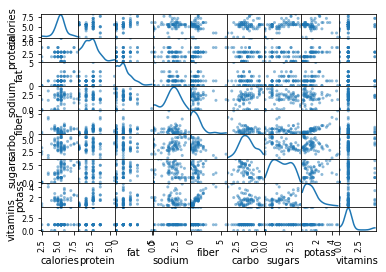

In [65]:
pd.plotting.scatter_matrix(cereal_rsc, diagonal='kde', alpha = 0.5)
plt.show()

In [51]:
hclust = linkage(cereal_rsc, method = 'complete', metric = 'euclid')
hclust

array([[  2.70000000e+01,   7.00000000e+01,   6.04085159e-02,
          2.00000000e+00],
       [  1.30000000e+01,   1.70000000e+01,   1.41086146e-01,
          2.00000000e+00],
       [  1.40000000e+01,   5.90000000e+01,   1.85747290e-01,
          2.00000000e+00],
       [  3.80000000e+01,   6.90000000e+01,   3.06949438e-01,
          2.00000000e+00],
       [  7.10000000e+01,   7.20000000e+01,   3.69252111e-01,
          2.00000000e+00],
       [  9.00000000e+00,   3.30000000e+01,   4.92755071e-01,
          2.00000000e+00],
       [  2.30000000e+01,   3.50000000e+01,   4.98566073e-01,
          2.00000000e+00],
       [  6.10000000e+01,   6.20000000e+01,   5.62071908e-01,
          2.00000000e+00],
       [  5.70000000e+01,   6.50000000e+01,   5.79108074e-01,
          2.00000000e+00],
       [  4.20000000e+01,   4.30000000e+01,   6.64493675e-01,
          2.00000000e+00],
       [  1.50000000e+01,   7.60000000e+01,   7.59855899e-01,
          3.00000000e+00],
       [  4.60000000e

In [52]:
hclust.round()
### 처음 2열은 변수 위치, 3번쨰 열은 거리, 4번쨰 열은 묶인 변수 개수

array([[  27.,   70.,    0.,    2.],
       [  13.,   17.,    0.,    2.],
       [  14.,   59.,    0.,    2.],
       [  38.,   69.,    0.,    2.],
       [  71.,   72.,    0.,    2.],
       [   9.,   33.,    0.,    2.],
       [  23.,   35.,    0.,    2.],
       [  61.,   62.,    1.,    2.],
       [  57.,   65.,    1.,    2.],
       [  42.,   43.,    1.,    2.],
       [  15.,   76.,    1.,    3.],
       [  46.,   73.,    1.,    2.],
       [  74.,   75.,    1.,    4.],
       [  22.,   40.,    1.,    2.],
       [  12.,   56.,    1.,    2.],
       [  19.,   84.,    1.,    4.],
       [  50.,   55.,    1.,    2.],
       [  31.,   48.,    1.,    2.],
       [   7.,   45.,    1.,    2.],
       [   6.,   47.,    1.,    2.],
       [  30.,   54.,    1.,    2.],
       [   5.,   28.,    1.,    2.],
       [  24.,   82.,    1.,    3.],
       [  11.,   79.,    1.,    3.],
       [  39.,   88.,    1.,    3.],
       [  63.,   95.,    1.,    3.],
       [  86.,   87.,    1.,    6.],
 

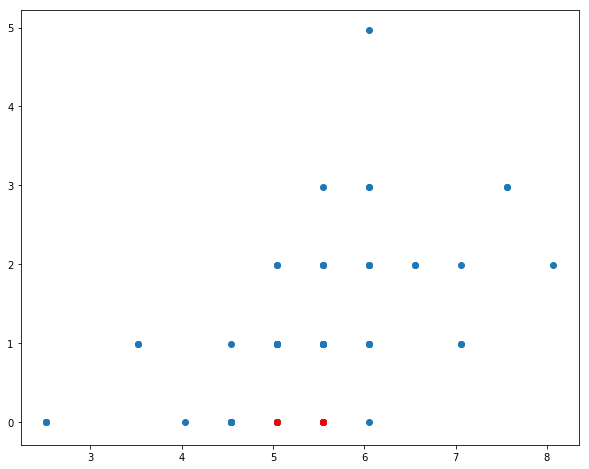

In [55]:
idxs = [14, 59, 15]
plt.figure(figsize = (10,8))
plt.scatter(cereal_rsc.iloc[:,0], cereal_rsc.iloc[:, 2])
plt.scatter(cereal_rsc.iloc[idxs, 0], cereal_rsc.iloc[idxs, 2], c = 'r')
plt.show()

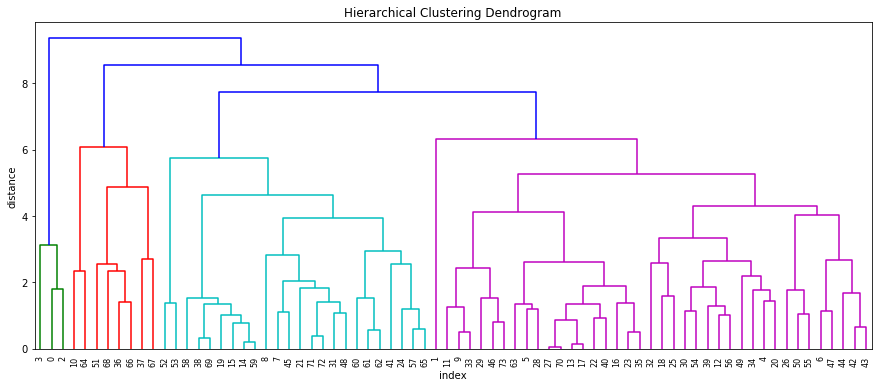

In [70]:
hclust = linkage(cereal_rsc, method = 'complete', metric = 'euclid')
plt.figure(figsize = (15,6))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('index')
plt.ylabel('distance')
dendrogram(
    hclust,
    leaf_rotation = 90,
    leaf_font_size = 8)
plt.show()

> 거리 기반 clustering

In [71]:
max_d = 4
cluster = fcluster(hclust, max_d, criterion = 'distance')
for i in range(max(cluster)+1):
    print(sum(cluster ==i))

0
3
2
4
2
2
7
15
6
12
12
3
5
1


In [72]:
cluster

array([ 1, 13,  1,  1, 10,  9, 12,  7,  7,  8,  2,  8, 10,  9,  6,  6,  9,
        9, 10,  6, 10,  7,  9,  9,  7, 10, 11,  9,  9,  8, 10,  7, 10,  8,
       10,  9,  3,  4,  6, 10,  9,  7, 12, 12, 12,  7,  8, 12,  7, 10, 11,
        3,  5,  5, 10, 11, 10,  7,  6,  6,  7,  7,  7,  9,  2,  7,  3,  4,
        3,  6,  9,  7,  7,  8], dtype=int32)

> 군집 개수 기반 clustering

In [73]:
k = 4
cluster = fcluster(hclust, k, criterion = 'maxclust')
for i in range(1,5):
    print(sum(cluster==i))

3
8
24
39


> 군집 별 특성 파악

In [76]:
for i in range(1,5):
    print(cereal_rsc.loc[(cluster==i), :].mean(),
         cereal_rsc.loc[(cluster==i), :].var())

calories    3.191578
protein     3.718158
fat         0.662147
sodium      2.134434
fiber       4.539094
carbo       1.713059
sugars      0.841150
potass      4.373671
vitamins    1.121360
dtype: float64 calories    0.338598
protein     0.000000
fat         0.328829
sodium      0.763897
fiber       1.191931
carbo       0.154065
sugars      0.543807
potass      0.139337
vitamins    0.000000
dtype: float64
calories    5.795234
protein     3.253388
fat         0.869068
sodium      2.673077
fiber       0.722129
carbo       4.561019
sugars      1.204374
potass      1.296229
vitamins    3.644421
dtype: float64 calories    0.653011
protein     2.221826
fat         0.405164
sodium      0.452239
fiber       0.279739
carbo       0.334855
sugars      0.973589
potass      0.779061
vitamins    2.425080
dtype: float64
calories    4.787367
protein     2.168925
fat         0.289689
sodium      1.729194
fiber       0.773709
carbo       4.486072
sugars      0.697772
potass      1.152204
vitamins    0.88

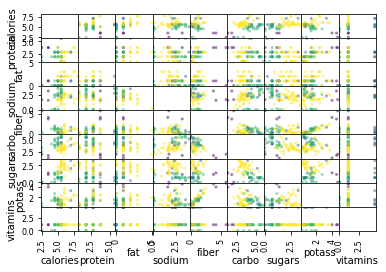

In [78]:
plt.figure(figsize = (15,10))
pd.plotting.scatter_matrix(cereal_rsc, diagonal = 'ked', alpha = .5, c = cluster)
plt.show()

 <br>
 <br>
 ___

> # kmeans

In [81]:
kmeans = KMeans(n_clusters = 4, random_state = 0).fit(cereal_rsc)
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [83]:
for i in range(4):
    print(sum(kmeans.labels_ ==i))

9
21
24
20


In [84]:
kmeans.cluster_centers_

array([[ 4.14345225,  2.27220744,  0.11035781,  0.02013617,  0.87113922,
         3.94003476,  0.5352773 ,  1.27761343,  0.49838233],
       [ 5.59126085,  1.416441  ,  0.99322026,  2.03662997,  0.23579708,
         3.19363066,  2.63269041,  0.6684796 ,  1.12136024],
       [ 5.4592783 ,  2.51750256,  0.70353102,  2.69824704,  0.67054795,
         4.80727068,  0.90805971,  1.04344962,  1.82221039],
       [ 5.66925054,  3.11395701,  1.73813546,  1.87266399,  1.87753426,
         3.10920135,  1.93846852,  2.61362085,  1.23349626]])

In [86]:
kmeans.labels_

array([4, 4, 4, 4, 2, 2, 3, 3, 4, 2, 3, 2, 4, 2, 3, 3, 2, 2, 4, 3, 2, 3, 2,
       2, 1, 4, 4, 2, 2, 2, 3, 3, 4, 2, 2, 2, 3, 3, 3, 4, 2, 1, 4, 4, 4, 3,
       2, 3, 3, 4, 4, 3, 1, 1, 4, 4, 4, 1, 3, 3, 1, 1, 1, 2, 3, 1, 3, 4, 3,
       3, 2, 3, 3, 2])

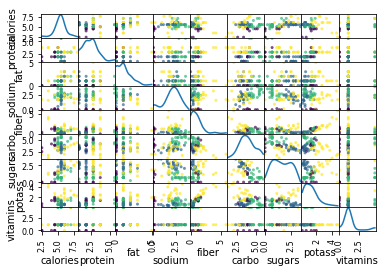

In [87]:
plt.figure(figsize = (15,15))
pd.plotting.scatter_matrix(cereal_rsc, diagonal = 'kde', alpha = 0.7, c = kmeans.labels_)
plt.show()

<br>
<br>

___
> # 다차원 축소법

In [91]:
mds = MDS(n_components = 2)
mds

MDS(dissimilarity='euclidean', eps=0.001, max_iter=300, metric=True,
  n_components=2, n_init=4, n_jobs=1, random_state=None, verbose=0)

In [92]:
pos = mds.fit(cereal_rsc).embedding_
pos.shape

(74, 2)

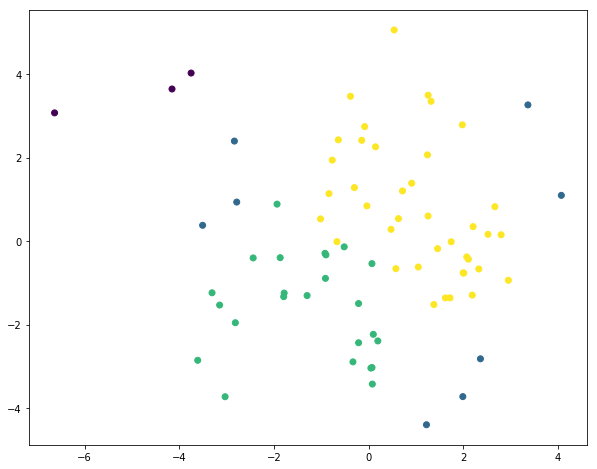

In [103]:
hclust = linkage(cereal_rsc, method = 'complete')
cluster_a = fcluster(hclust, 4, criterion = 'maxclust')
plt.figure(figsize = (10,8))
plt.scatter(pos[:,0], pos[:,1], c = cluster_a)
plt.show()

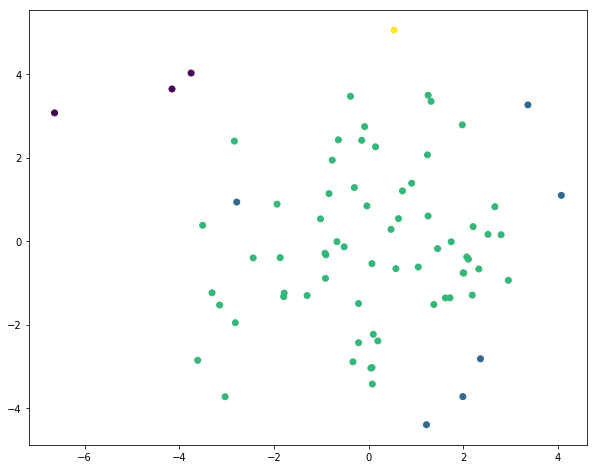

In [107]:
hclust = linkage(cereal_rsc, method = 'single')
cluster_a = fcluster(hclust, 4, criterion = 'maxclust')
plt.figure(figsize = (10,8))
plt.scatter(pos[:,0], pos[:,1], c = cluster_a)
plt.show()

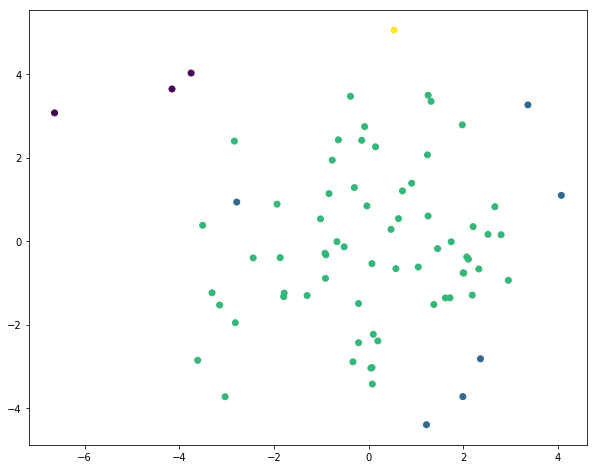

In [108]:
hclust = linkage(cereal_rsc, method = 'average')
cluster_a = fcluster(hclust, 4, criterion = 'maxclust')
plt.figure(figsize = (10,8))
plt.scatter(pos[:,0], pos[:,1], c = cluster_a)
plt.show()

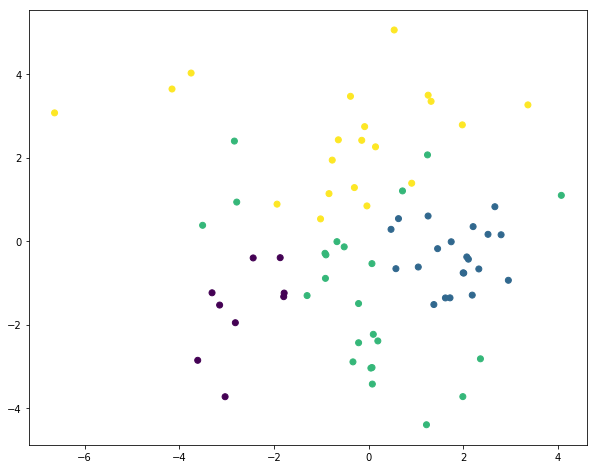

In [109]:
hclust = linkage(cereal_rsc, method = 'complete')
cluster_a = fcluster(hclust, 4, criterion = 'maxclust')
plt.figure(figsize = (10,8))
plt.scatter(pos[:,0], pos[:,1], c = kmeans.labels_)
plt.show()